In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')

In [4]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [8]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Showing the count of NaNs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


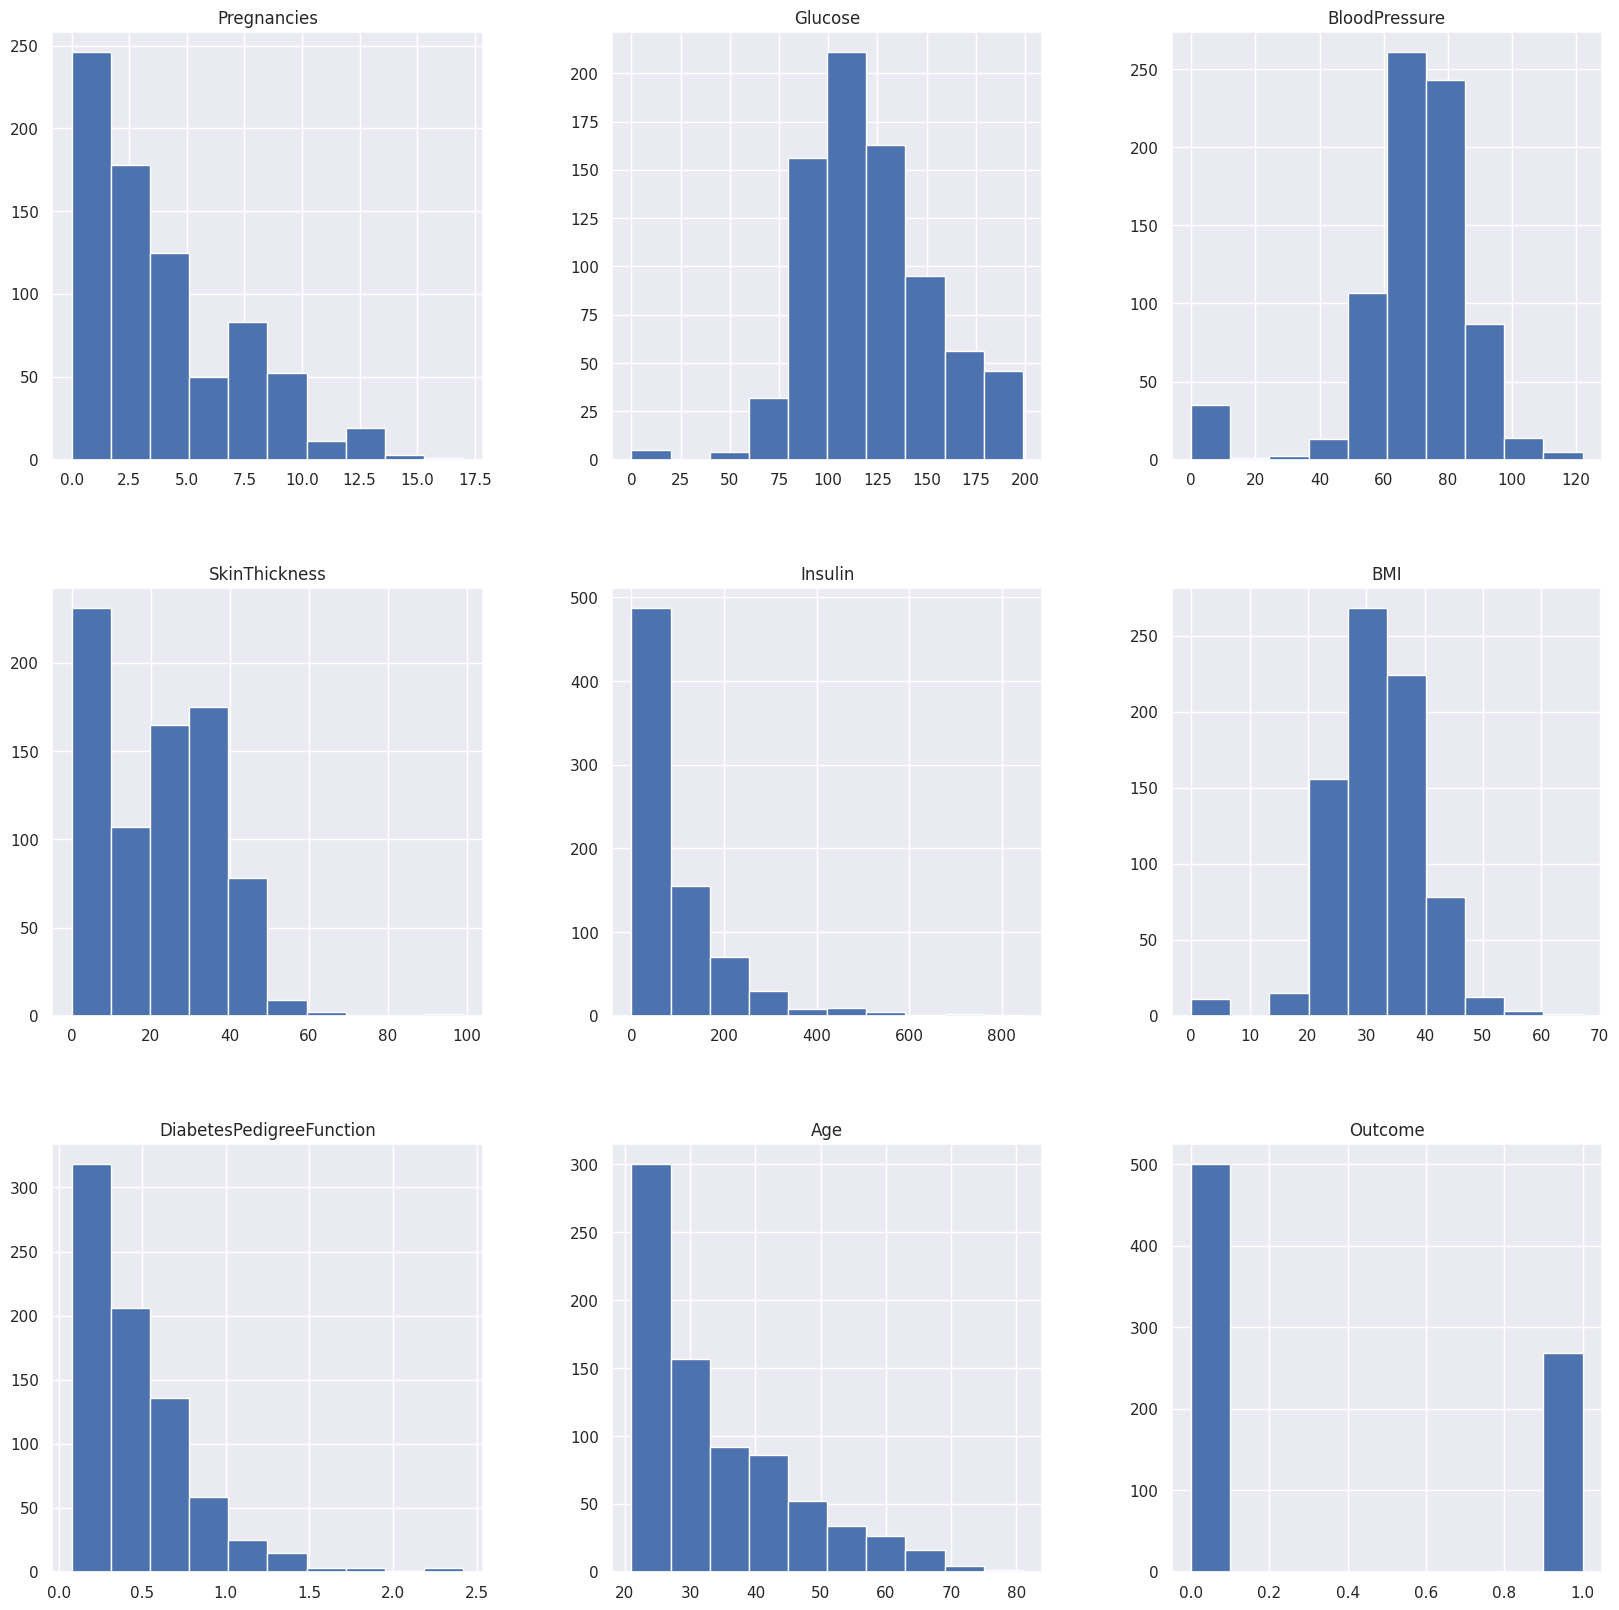

In [10]:
p = diabetes_df.hist(figsize=(20, 20))

In [11]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)

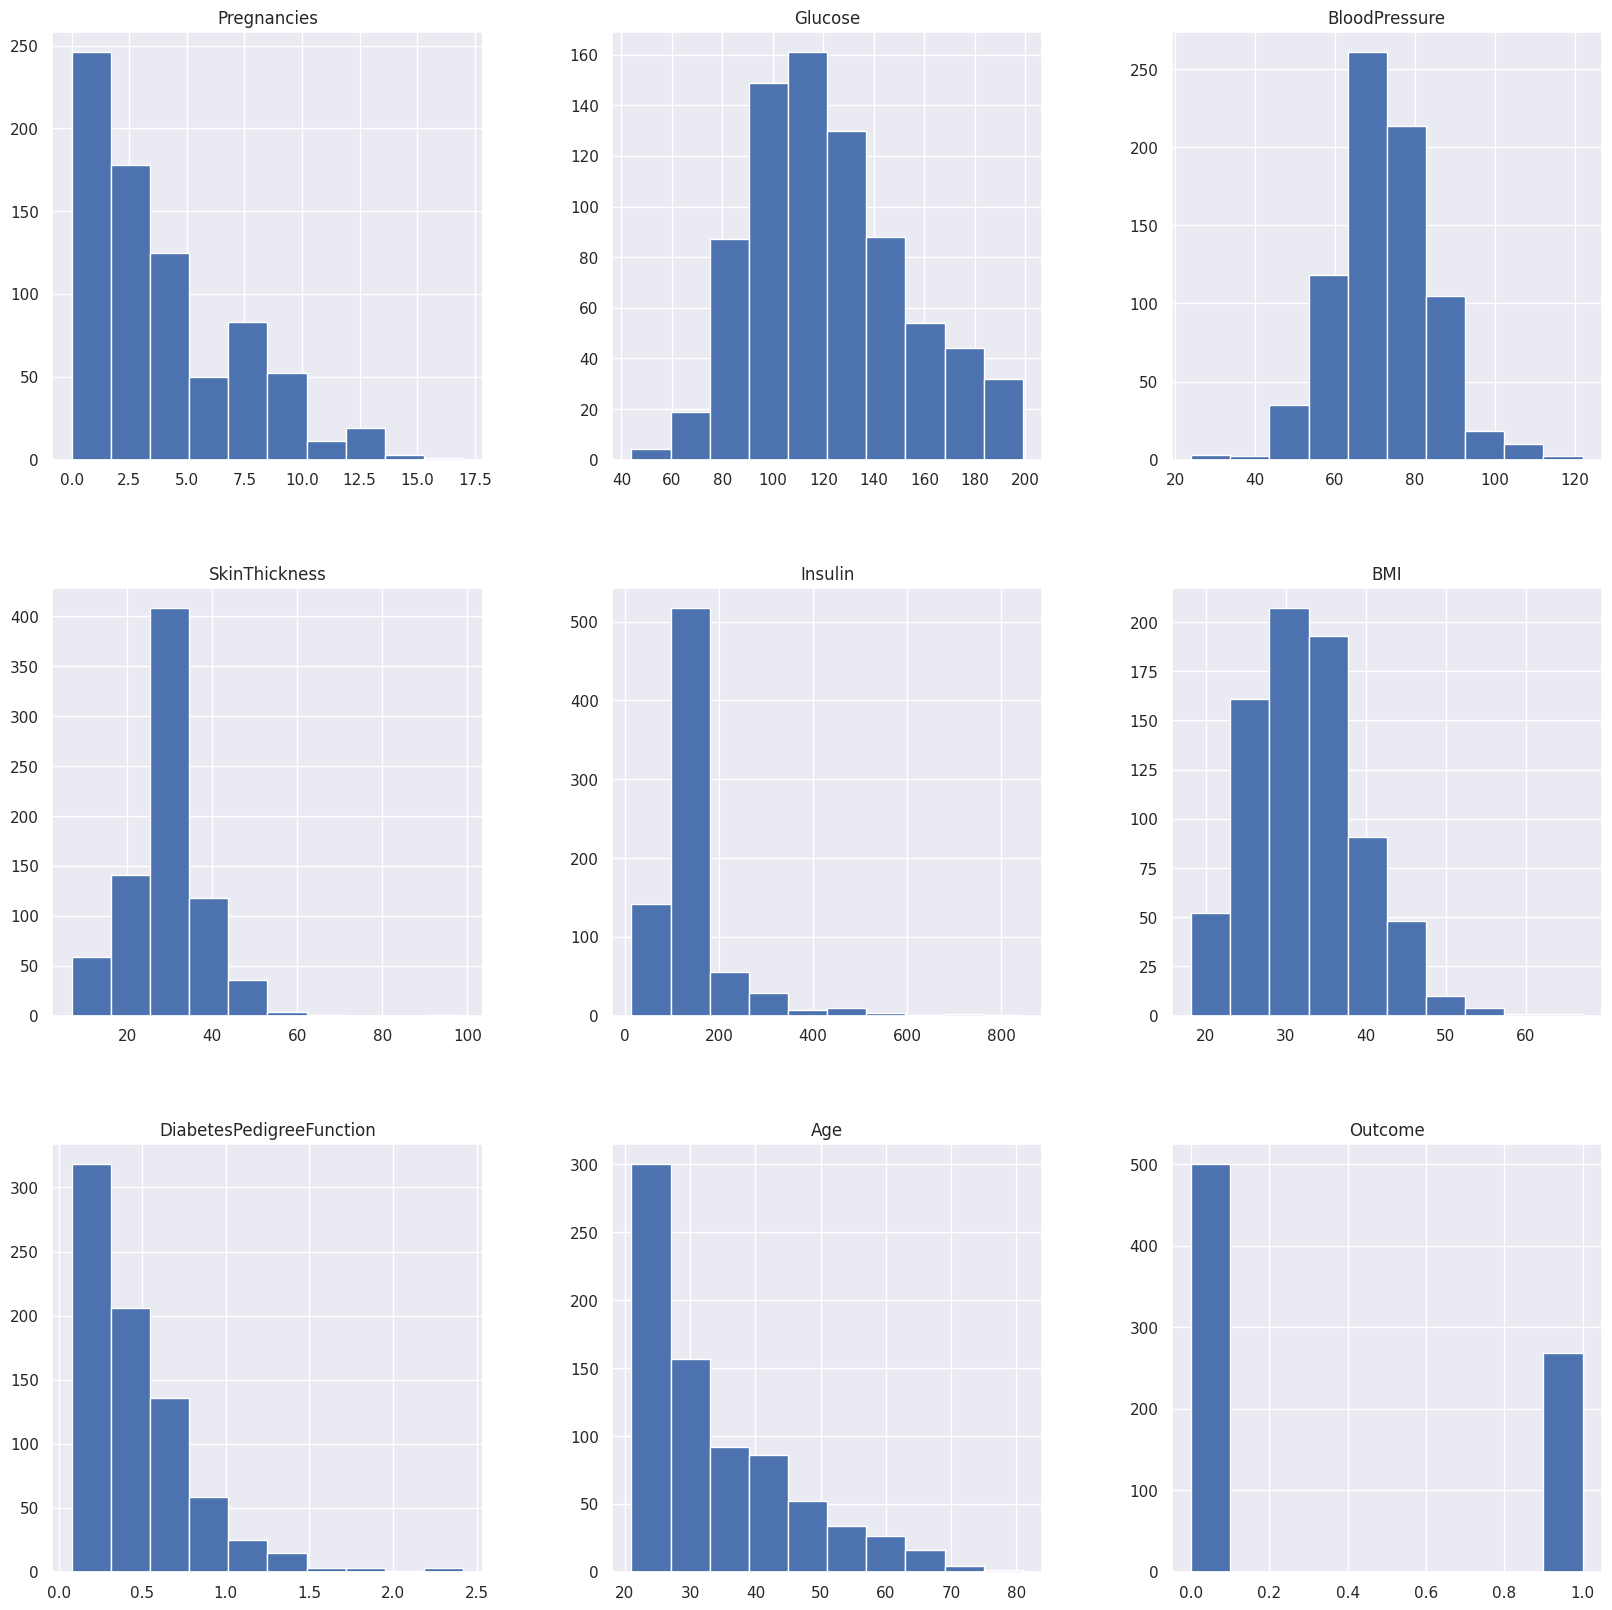

In [12]:
p = diabetes_df_copy.hist(figsize=(20, 20))

In [13]:
from sklearn.preprocessing import StandardScaler                                      #stdscl

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(['Outcome'], axis=1)),

columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [14]:
y = diabetes_df_copy.Outcome #The ‘Outcome’ column shows whether a patient has diabetes (1) or not (0).
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [16]:
from sklearn.model_selection import train_test_split                                #split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [18]:
predictions = rfc.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions)))

Test Accuracy = 0.7716535433070866


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[136  26]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       162
           1       0.70      0.65      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.77      0.77      0.77       254



In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
predictions = dtree.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions)))

Test Accuracy = 0.7165354330708661


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[129  33]
 [ 39  53]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       162
           1       0.62      0.58      0.60        92

    accuracy                           0.72       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.71      0.72      0.71       254



In [23]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [24]:
svc_pred = svc_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, svc_pred)))

Test Accuracy = 0.7480314960629921


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254

